## Solving the "banknote authentication" problem

0-th iteration with the best fitness = 0.05742728690909124
1-th iteration with the best fitness = 0.04254301222572723
2-th iteration with the best fitness = 0.04254301222572723
3-th iteration with the best fitness = 0.02604855269788596
4-th iteration with the best fitness = 0.002121519117887461
5-th iteration with the best fitness = 0.002121519117887461
6-th iteration with the best fitness = 1.0000000494736552e-07
7-th iteration with the best fitness = 1.0000000494736552e-07
8-th iteration with the best fitness = 1.0000000494736552e-07
9-th iteration with the best fitness = 1.0000000494736552e-07
10-th iteration with the best fitness = 1.0000000494736552e-07
11-th iteration with the best fitness = 1.0000000494736552e-07
12-th iteration with the best fitness = 1.0000000494736552e-07
13-th iteration with the best fitness = 1.0000000494736552e-07
confusion_matrix: 
 [[222   0]
 [  2 188]]
f1_score: 
 0.9947089947089947


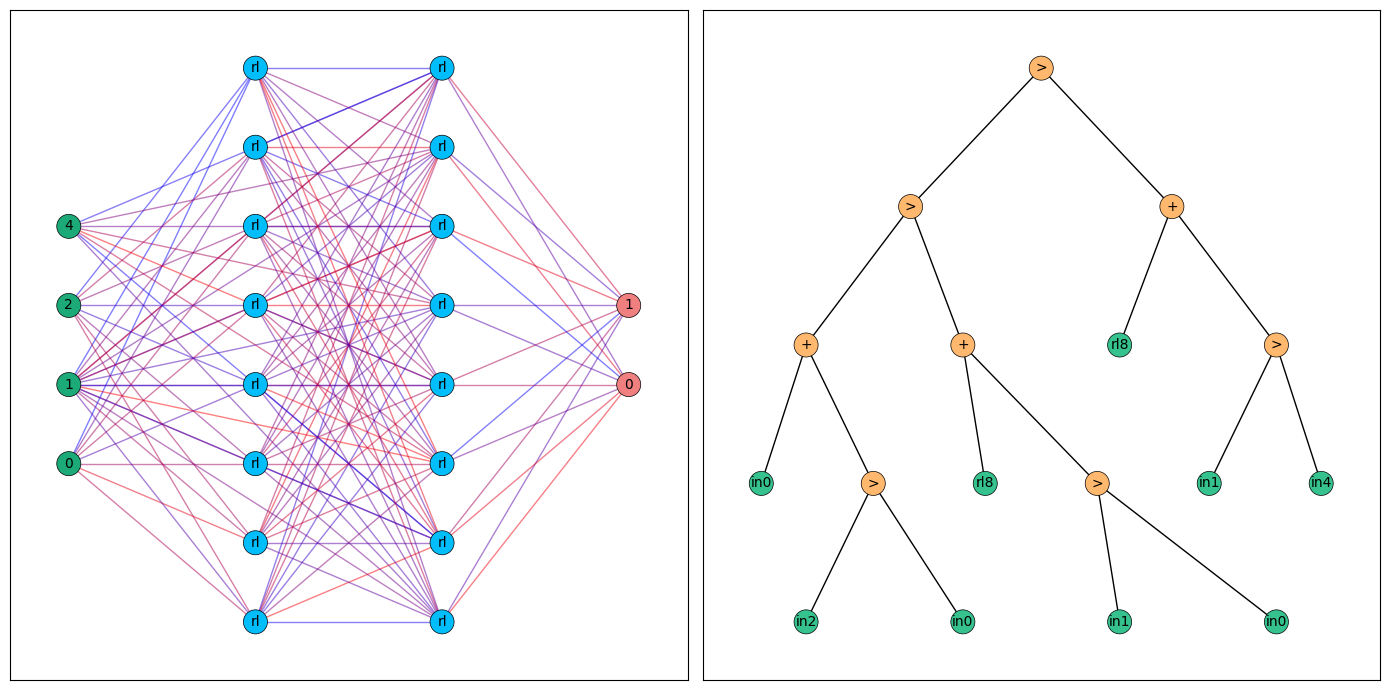

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thefittest.optimizers import SelfCGP
from thefittest.optimizers import SHADE
from thefittest.benchmarks import BanknoteDataset
from thefittest.classifiers import GeneticProgrammingNeuralNetClassifier
from thefittest.tools.print import print_net
from thefittest.tools.print import print_tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score



data = BanknoteDataset()
X = data.get_X()
y = data.get_y()

X_scaled = minmax_scale(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3)

model = GeneticProgrammingNeuralNetClassifier(iters=15,
                                              pop_size=50,
                                              optimizer=SelfCGP,
                                              optimizer_args={"show_progress_each": 1},
                                              weights_optimizer=SHADE,
                                              weights_optimizer_args={"iters": 100, "pop_size": 100})

model.fit(X_train, y_train)

predict = model.predict(X_test)
optimizer = model.get_optimizers()

tree = optimizer.get_fittest()["genotype"]
net = optimizer.get_fittest()["phenotype"]

print("confusion_matrix: \n", confusion_matrix(y_test, predict))
print("f1_score: \n", f1_score(y_test, predict))

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)
print_net(net = net, ax = ax[0])

print_tree(tree = tree, ax = ax[1])

plt.tight_layout()
plt.show()

## modeling of the "sin" function

0-th iteration with the best fitness = 0.08877136504375589
1-th iteration with the best fitness = 0.08232270357313226
2-th iteration with the best fitness = 0.06579396049409164
3-th iteration with the best fitness = 0.06579396049409164
4-th iteration with the best fitness = 0.06579396049409164
5-th iteration with the best fitness = 0.06579396049409164
6-th iteration with the best fitness = 0.06458648341276804
7-th iteration with the best fitness = 0.058766953050261174
8-th iteration with the best fitness = 0.058766953050261174
9-th iteration with the best fitness = 0.058766953050261174
10-th iteration with the best fitness = 0.058766953050261174
11-th iteration with the best fitness = 0.058766953050261174
12-th iteration with the best fitness = 0.058766953050261174
13-th iteration with the best fitness = 0.058766953050261174
coefficient_determination: 
 0.9743066642494792


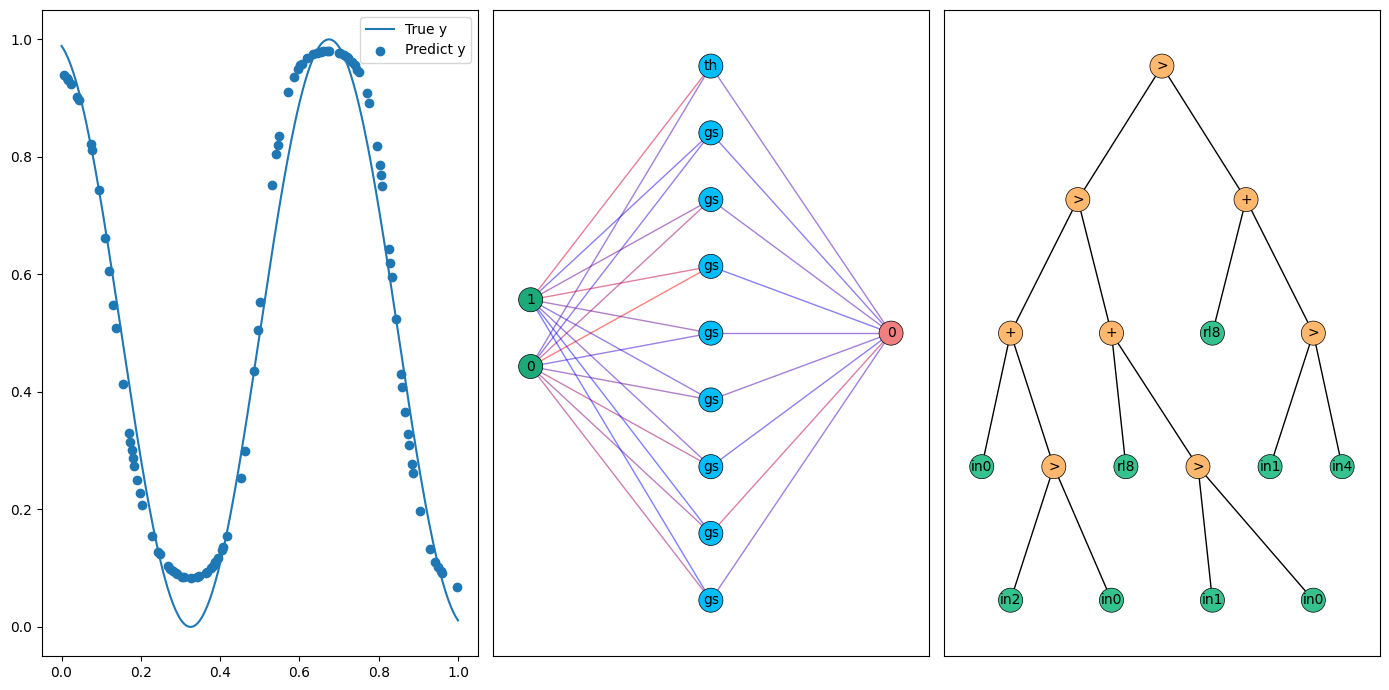

In [2]:
from thefittest.regressors import GeneticProgrammingNeuralNetRegressor
from sklearn.metrics import r2_score


def problem(x):
    return np.sin(x[:,0])


function = problem
left_border = -4.5
right_border = 4.5
sample_size = 300
n_dimension = 1

X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
y = function(X)
X_scaled = minmax_scale(X)
y_scaled = minmax_scale(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.33)

model = GeneticProgrammingNeuralNetRegressor(iters=15,
                                             pop_size=50,
                                             optimizer=SelfCGP,
                                             optimizer_args={"show_progress_each": 1},
                                             weights_optimizer=SHADE,
                                             weights_optimizer_args={"iters": 100, "pop_size": 100})

model.fit(X_train, y_train)

predict = model.predict(X_test)
net = model.get_optimizers().get_fittest()["phenotype"]

print("coefficient_determination: \n", r2_score(y_test, predict))

fig, ax = plt.subplots(figsize=(14, 7), ncols=3, nrows=1)

ax[0].plot(X_scaled[:,0], y_scaled, label = "True y")
ax[0].scatter(X_test[:,0], predict, label = "Predict y")
ax[0].legend()

print_net(net = net, ax = ax[1]) 

print_tree(tree = tree, ax = ax[2])

plt.tight_layout()
plt.show()
